## Problem 2: Investigating a time-varying criminal network

In this problem, you will study a time-varying criminal network that is repeatedly disturbed by police forces. The data for this problem can be found in the CAVIAR directory of the data archive.

The CAVIAR investigation lasted two years and ran from 1994 to 1996. The operation brought together investigation units of the Montréal police and the Royal Canadian Mounted Police of Canada. During this two year period, 11 wiretap warrants, valid for a period of about two months each, were obtained (the 11 matrices contained in `phase1.csv, phase2.csv, ...` correspond to these eleven, two month wiretap phases).

This case is interesting because, unlike other investigative strategies, the mandate of the CAVIAR project was to seize the drugs without arresting the perpetrators. During this period, imports of the trafficking network were hit by the police on eleven occasions. The arrests took place only at the end of the investigation. Monetary losses for traffickers were estimated at 32 million dollars. Eleven seizures took place throughout the investigation. Some phases included no seizures, and others included multiple. The following summarizes the 11 seizures:

Phase | # of seizures | Money | Drug Amount
----- | ------------- | ----- | -----------
Phase 4 | 1 seizure | $2,500,000 | 300 kg of marijuana
Phase 6 | 3 seizures | $1,300,000 | 2 x 15 kg of marijuana + 1 x 2 kg of cocaine
Phase 7 | 1 seizure | $3,500,000 | 401 kg of marijuana
Phase 8 | 1 seizure | $360,000 | 9 kg of cocaine
Phase 9 | 2 seizures | $4,300,000 | 2 kg of cocaine + 1 x 500 kg marijuana
Phase 10 | 1 seizure | $18,700,000 | 2200 kg of marijuana
Phase 11 | 2 seizures | $1,300,000 | 12 kg of cocaine + 11 kg of cocaine

This case offers a rare opportunity to study a criminal network in upheaval from police forces. This allows us to analyze changes in the network structure and to survey the reaction and adaptation of the participants while they were subjected to an increasing number of distressing constraints.

The network consists of 110 (numbered) players. Players 1-82 are the traffickers. Players 83-110 are the non-traffickers (financial investors; accountants; owners of various importation businesses, etc.). Initially, the investigation targeted Daniel Serero, the alleged mastermind of a drug network in downtown Montréal, who attempted to import marijuana to Canada from Morocco, transiting through Spain. After the first seizure, happening in Phase 4, traffickers reoriented to cocaine import from Colombia, transiting through the United States.

According to the police, the role of 23 of the players in the “Serero organization" are the following, listed by name (unique id):

* Daniel Serero (n1) : Mastermind of the network.

* Pierre Perlini (n3) : Principal lieutenant of Serero, he executes Serero's instructions.

* Alain (n83) and Gérard (n86) Levy : Investors and transporters of money.

* Wallace Lee (n85) : Takes care of financial affairs (accountant).

* Gaspard Lino (n6): Broker in Spain.

* Samir Rabbat (n11): Provider in Morocco.

* Lee Gilbert (n88): Trusted man of Wallace Lee (became an informer after the arrest).

* Beverly Ashton (n106): Spouse of Lino, transports money and documents.

* Antonio Iannacci (n89): Investor.

* Mohammed Echouafni (n84): Moroccan investor.

* Richard Gleeson (n5), Bruno de Quinzio (n8) and Gabrielle Casale (n76) : Charged with recuperating the marijuana.

* Roderik Janouska (n77): Individual with airport contacts.

* Patrick Lee (n87): Investor.

* Salvatore Panetta (n82): Transport arrangements manager.

* Steve Cunha (n96): Transport manager, owner of a legitimate import company (became an informer after the arrest).

* Ernesto Morales (n12): Principal organizer of the cocaine import, intermediary between the Colombians and the Serero organization.

* Oscar Nieri (n17): The handyman of Morales.

* Richard Brebner (n80): Was transporting the cocaine from the US to Montréal.

* Ricardo Negrinotti (n33): Was taking possession of the cocaine in the US to hand it to Brebner.

* Johnny Pacheco (n16): Cocaine provider.

In the data files (`phase1.csv, phase2.csv, ...`), you will find matrices that report the number of wiretapped correspondences between the above players in the network, where players are identified by their unique id. You will be analyzing this time-varying network, giving a rough sketch of its shape, its evolution and the role of the actors in it.

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import pprint
import matplotlib.pyplot as plt
from typing import List, Union, Dict, Tuple

# Instantiate a pretty printer
pp = pprint.PrettyPrinter(indent=4)

In [2]:
phases = {}
G = {}

# Load the data from the internet
for i in range(1,12): 

    # Build the file name
    var_name = "phase" + str(i)
    file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"

    # Load and properly parse the data
    phases[i] = pd.read_csv(file_name, index_col = ["players"])
    phases[i].columns = "n" + phases[i].columns
    phases[i].index = phases[i].columns
    phases[i][phases[i] > 0] = 1

    # Turn the generated pandas dataframe into a networkx graph
    G[i] = nx.from_pandas_adjacency(phases[i])
    G[i].name = var_name

### Part (a): Question 1

{   1: {'edges': 18, 'nodes': 15},
    2: {'edges': 28, 'nodes': 24},
    3: {'edges': 56, 'nodes': 33},
    4: {'edges': 48, 'nodes': 33},
    5: {'edges': 39, 'nodes': 32},
    6: {'edges': 47, 'nodes': 27},
    7: {'edges': 49, 'nodes': 36},
    8: {'edges': 58, 'nodes': 42},
    9: {'edges': 44, 'nodes': 34},
    10: {'edges': 50, 'nodes': 42},
    11: {'edges': 50, 'nodes': 41}}


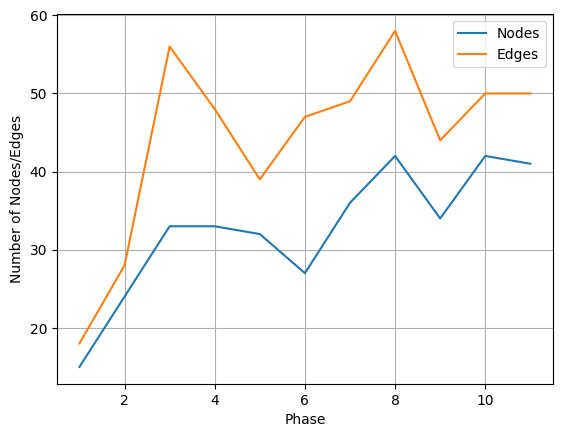

In [3]:
# Get the number of nodes and edges at each phase
# (Range skips the last element, so we add 1 to include the last phase)
phases = list(range(1, len(G) + 1))

# Get the number of nodes and edges at each phase
phase_nodes: List[int] = [G[i].number_of_nodes() for i in phases]
phase_edges: List[int] = [G[i].number_of_edges() for i in phases]

# Create a dictionary where the key consists of the phase and the value is 
# a dictionary with one key for the number of nodes and one for the number of edges
phase_dict: Dict[int, Dict[str, int]] = {
    i: {
        "nodes": phase_nodes[i-1], 
        "edges": phase_edges[i-1]
    } for i in phases
}
pp.pprint(phase_dict)

# Plot the number of nodes and edges at each phase
plt.plot(phases, phase_nodes, label = "Nodes")
plt.plot(phases, phase_edges, label = "Edges")
plt.xlabel("Phase")
plt.ylabel("Number of Nodes/Edges")
plt.grid()
plt.legend()
plt.show()

### Part (a): Question 2

Note: I should mention that the course suggests the use of Graphviz to visualize the network. However, since I'm on windows, I found it a big hassle to install it, so I simply used the `kamada_kawai_layout` function to get somewhat similar results.

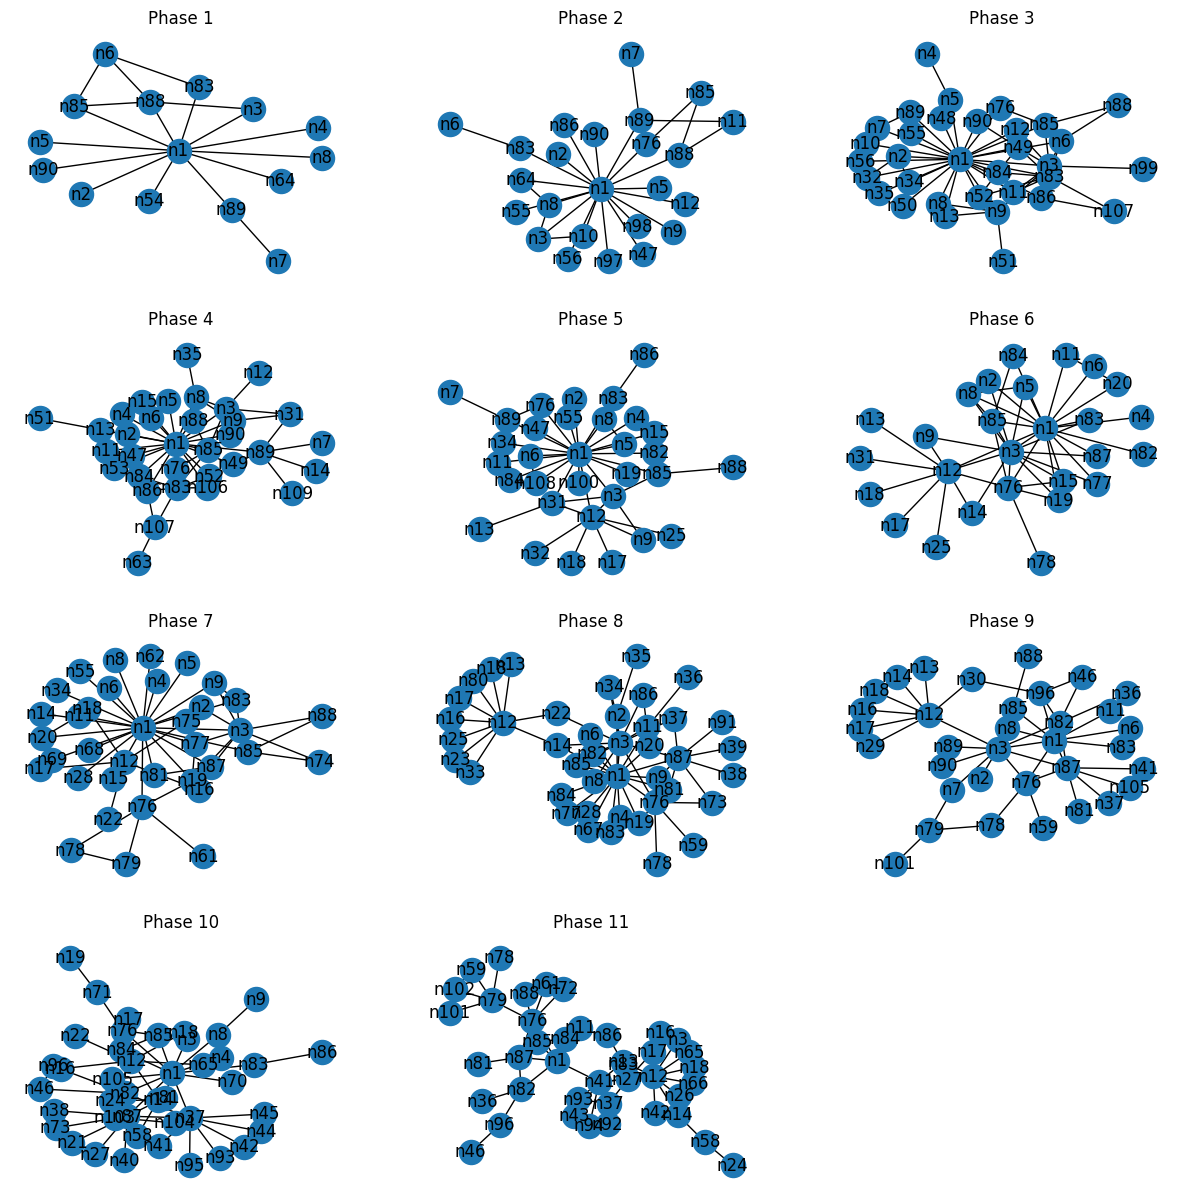

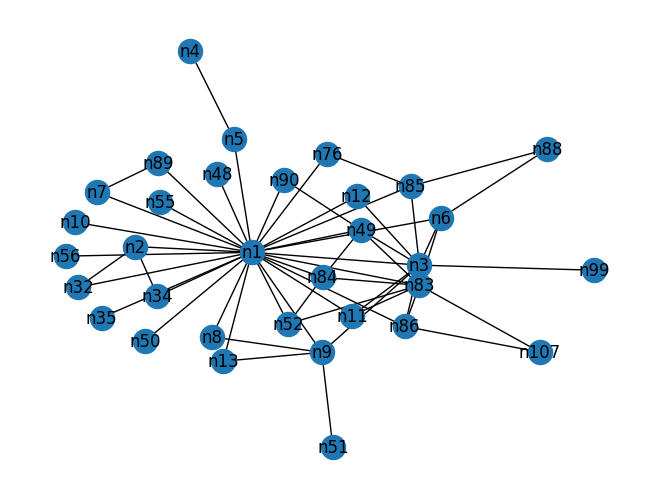

In [4]:
# Create a plot with 4 rows and 3 columns, one subplot for each phase
fig, axs = plt.subplots(4, 3, figsize = (15, 15))

# Iterate over the subplots
for i in range(4):
    for j in range(3):

        # Get the index of the current subplot
        index = i * 3 + j + 1

        # There is no "phase 12" so we dont generate a plot if the index is 12
        if index < 12:

            # Plot the graph at the current phase
            nx.draw(
                G[index], 
                with_labels = True, 
                pos=nx.kamada_kawai_layout(G[index]),  
                ax = axs[i, j]
            )

            # Set the title of the subplot
            axs[i, j].set_title("Phase " + str(index))
        
        # Remove the subplot if the "phase 12" is reached
        else:
            axs[i, j].axis("off")

# Show the grid of subplots
plt.show()

# Show the plot for phase 3 in a bigger size to see the details
nx.draw(
    G[3],
    with_labels = True,
    pos=nx.kamada_kawai_layout(G[3]),
)

# Show the zoomin on phase 3
plt.show()

### Part (b): Question 1

The normalized degree centrality of node $i$ is defined as

$$
\displaystyle  \tilde{k}_ i
\displaystyle = \frac{k_ i}{n-1},
$$

where $k_i$ is the degree of node $i$ and $n$ is the number of nodes in the network. You can compute the normalized degree centrality using the function `nx.degree_centrality(G)`.

In [5]:
# Compute the degree centrality for the following nodes
nodes_of_interest = ["n1", "n3", "n12", "n83"]

# Get the degree centrality in phase 3 and 9
phase3_degree_centrality = nx.degree_centrality(G[3])
phase9_degree_centrality = nx.degree_centrality(G[9])

# Create a dictionary where the key consists of the node of interest
# and the value is a dictionary with one key for the degree centrality in phase 3
# and one for the degree centrality in phase 9
degree_centrality_dict: Dict[str, Dict[int, float]] = {
    node: {
        3: phase3_degree_centrality[node],
        9: phase9_degree_centrality[node]
    } for node in nodes_of_interest
}
print("Degree Centrality")
pp.pprint(degree_centrality_dict)

Degree Centrality
{   'n1': {3: 0.84375, 9: 0.30303030303030304},
    'n12': {3: 0.0625, 9: 0.24242424242424243},
    'n3': {3: 0.28125, 9: 0.33333333333333337},
    'n83': {3: 0.25, 9: 0.030303030303030304}}


### Part (b): Question 2

For each of the 11 phases and for each of the players under investigation, compute and list the normalized betweenness centrality of the player.

For undirected graphs, the normalized betweenness centrality for node $i$ is defined as

$$
\displaystyle  \tilde{B}_ i = \frac{2}{(n-1)(n-2)} \sum _{s\neq i\neq t} \frac{n^ i_{st}}{g_{st}},
$$

where $n^i_{st}$ is the number of shortest paths between $s$ and $t$ that pass through $i$ and $g_{st}$ is the total number of shortest paths between $s$ and $t$. Note that this considers both orderings of each pair of nodes, so for undirected graphs, a path counts twice (as it counts both for $n^i_{st}$ and for $n^i_{ts}$.

You can compute the normalized betweenness centrality using the function `nx.betweenness_centrality(G, normalized=True)`.

In [6]:
# Get the betweenness centrality in phase 3 and 9
phase3_betweenness_centrality = nx.betweenness_centrality(G[3], normalized=True)
phase9_betweenness_centrality = nx.betweenness_centrality(G[9], normalized=True)

# Create a dictionary where the key consists of the node of interest
# and the value is a dictionary with one key for the betweenness centrality in phase 3
# and 9
betweenness_centrality_dict: Dict[str, Dict[int, float]] = {
    node: {
        3: phase3_betweenness_centrality[node],
        9: phase9_betweenness_centrality[node]
    } for node in nodes_of_interest
}
pp.pprint(betweenness_centrality_dict)

{   'n1': {3: 0.829502688172043, 9: 0.2490530303030303},
    'n12': {3: 0.0, 9: 0.3573232323232323},
    'n3': {3: 0.09549731182795697, 9: 0.5762310606060607},
    'n83': {3: 0.046572580645161295, 9: 0.0}}


### Part (b): Question 3

For each of the 11 phases and for each of the players under investigation, compute and list the eigenvector centrality of the player.

Ensure your eigenvector centrality is normalized as

$$
\sqrt{\sum _ i v_ i^2} = 1.
$$ 

You can compute the eigenvector centrality using the function `nx.eigenvector_centrality(G)`.

In [7]:
# Get the eigenvector centrality in phase 3 and 9
phase3_eigenvector_centrality = nx.eigenvector_centrality(G[3])
phase9_eigenvector_centrality = nx.eigenvector_centrality(G[9])

# Create a dictionary where the key consists of the node of interest
# and the value is a dictionary with one key for the eigenvector centrality in phase 3
# and 9
eigenvector_centrality_dict: Dict[str, Dict[int, float]] = {
    node: {
        3: phase3_eigenvector_centrality[node],
        9: phase9_eigenvector_centrality[node]
    } for node in nodes_of_interest
}
pp.pprint(eigenvector_centrality_dict)

{   'n1': {3: 0.5938791958045414, 9: 0.4589575176167989},
    'n12': {3: 0.13599046901759537, 9: 0.14065936326685183},
    'n3': {3: 0.29130488767289103, 9: 0.4679877147323067},
    'n83': {3: 0.2774973009007579, 9: 0.09178102356758051}}


### Part (b): Question 4

Recall the mathematical definition of each of these metrics, along with the algorithm that is best suited to compute it and the corresponding time complexity.

Which algorithm is the fastest for this data set?

In [8]:
# Time the execution of the code
from timeit import timeit

# Time the execution of each code snippet after running it 1000 times
dc = timeit("nx.degree_centrality(G[3])", globals=globals(), number=1000)
bc = timeit("nx.betweenness_centrality(G[3], normalized=True)", globals=globals(), number=1000)
ec = timeit("nx.eigenvector_centrality(G[3])", globals=globals(), number=1000)

# Display the results of the timing 
print("Runtime")
print("- Degree Centrality: ", dc, "s")
print("- Betweenness Centrality: ", bc, "s")
print("- Eigenvector Centrality: ", ec, "s")

# Conclusion:
# - The betweenness centrality is probably the most time consuming to compute since it
#   first requires the computation of the shortest paths between all pairs of nodes followed
#   by the actual computation of the betweenness centrality
# - The eigenvector centrality requires the computation of the eigenvalues and eigenvectors
#   of the adjacency matrix, which can be time consuming depending on the matrix size.
# - The degree centrality can be calculated by summing the number of edges for each node, and
#   dividing by the number of nodes. 

Runtime
- Degree Centrality:  0.006823800000006486 s
- Betweenness Centrality:  1.4003244999999822 s
- Eigenvector Centrality:  0.5035869000000162 s


### Part (b): Question 5

The data from questions 1 to 3 can be used to perform different types of quantitative analyses. In this question we will look at performing one such analysis - we will determine the temporal consistency of a player's centrality , i.e. which players consistently remained active and central throughout most of the phases and which didn't?

To answer this question, look at the temporal evolution of the networks and calculate the mean centrality for each of the centrality metrics, across all phases, for every player.

In [10]:
# =========== BETWEENNESS CENTRALITY =========== #

# Calculate the betweenness centrality for each phase
betweenness_centrality = {
    i: nx.betweenness_centrality(G[i], normalized=True) for i in phases
}

# Number of nodes (players) in the network
num_players = 110

# Average the betweenness centrality for each player across all phases
average_betweenness = {}
for i in range(num_players):

    # Create a key for each player (n1, n2, n3, ...)
    player_name = "n" + str(i+1)

    # Initialize the betweenness centrality to 0
    average_betweenness[player_name] = 0

    # Add up the betweenness centrality for each phase
    for phase in phases:
        if player_name not in betweenness_centrality[phase]:
            average_betweenness[player_name] += 0
        else:
            average_betweenness[player_name] += betweenness_centrality[phase][player_name]
        
    # Divide by the number of phases to get the average
    average_betweenness[player_name] /= len(phases)

# Sort the average betweenness centrality in descending order
# (x[1] refers to the betweenness centrality value)
sorted_average_betweenness = sorted(
    average_betweenness.items(), 
    key=lambda x: x[1], 
    reverse=True
)

# Print the top 3 players with the highest average betweenness centrality
print("Top Players with Highest Average Betweenness Centrality")
pp.pprint(sorted_average_betweenness[:5])


# =========== EIGENVECTOR CENTRALITY =========== #

# Calculate the eigenvector centrality for each phase
eigenvector_centrality = {
    i: nx.eigenvector_centrality(G[i]) for i in phases
}

# Average the eigenvector centrality for each player across all phases
average_eigenvector = {}
for i in range(num_players):

    # Create a key for each player (n1, n2, n3, ...)
    player_name = "n" + str(i+1)

    # Initialize the eigenvector centrality to 0
    average_eigenvector[player_name] = 0

    # Add up the eigenvector centrality for each phase
    for phase in phases:
        if player_name not in eigenvector_centrality[phase]:
            average_eigenvector[player_name] += 0
        else:
            average_eigenvector[player_name] += eigenvector_centrality[phase][player_name]
        
    # Divide by the number of phases to get the average
    average_eigenvector[player_name] /= len(phases)

# Sort the average eigenvector centrality in descending order
# (x[1] refers to the eigenvector centrality value)
sorted_average_eigenvector = sorted(
    average_eigenvector.items(),
    key=lambda x: x[1],
    reverse=True
)

# Print the top 3 players with the highest average eigenvector centrality
print()
print("Top Players with Highest Average Eigenvector Centrality")
pp.pprint(sorted_average_eigenvector[:5])


Top Players with Highest Average Betweenness Centrality
[   ('n1', 0.655050992293228),
    ('n12', 0.16756212382251084),
    ('n3', 0.12940285961873224),
    ('n76', 0.08379132554240724),
    ('n87', 0.06132692752337006)]

Top Players with Highest Average Eigenvector Centrality
[   ('n1', 0.5463910796025787),
    ('n3', 0.2980946631382842),
    ('n85', 0.19061181579919984),
    ('n76', 0.1658774444630568),
    ('n83', 0.15352180271841845)]


### Part (c): 

**(2 points) (100 words, 200 word limit.)**

Observe the plot you made in Part (a) Question 1. The number of nodes increases sharply over the first few phases then levels out. Comment on what you think may be causing this effect. Based on your answer, should you adjust your conclusions in Part (b) Question 5?

- The biggest spike in the number of edges (or connections) was in phase 3, with the number of edges doubling from phase 2 at 56. Obviously the operation was ramping up at this point, and because no seizures had ocurred, the network was only growing. This can be evidenced by plotting the evolution of the degree for each node in the network: The number of poorly connected players remained mostly the same across all phases, but a few key players drastically increased their numbers in phase 3, mainly n1, n3, n83, n12 and n85. These were reported in Part (b) Question 5, so I don't think it would be necessary to change my answer, as their growth also makes intuitive sense: Daniel Serero (n1) is the mastermind and Pierre Perlini (n3) is his lieutenant, so a large growth is to be expected in the initial stages in order to setup the operation. Alain Levy (n83) is an investor and money transporter, so it could be seen as him getting more people involved for his own gain. Wallace Lee (n85) was Daniel's accountant, but it makes sense for him to increase his activity as more cash was flowing into the operation. And finally Ernesto Morales (n12) is the principal organizer of the cocaine import, a basic player to have in order to move the drugs over to Canada. The only player not mentioned in Question 5 was Alain, but it makes sense that his contribution was the weakest as his number of connections suddenly dropped after phase 3 (probably scared because of the first seizure).

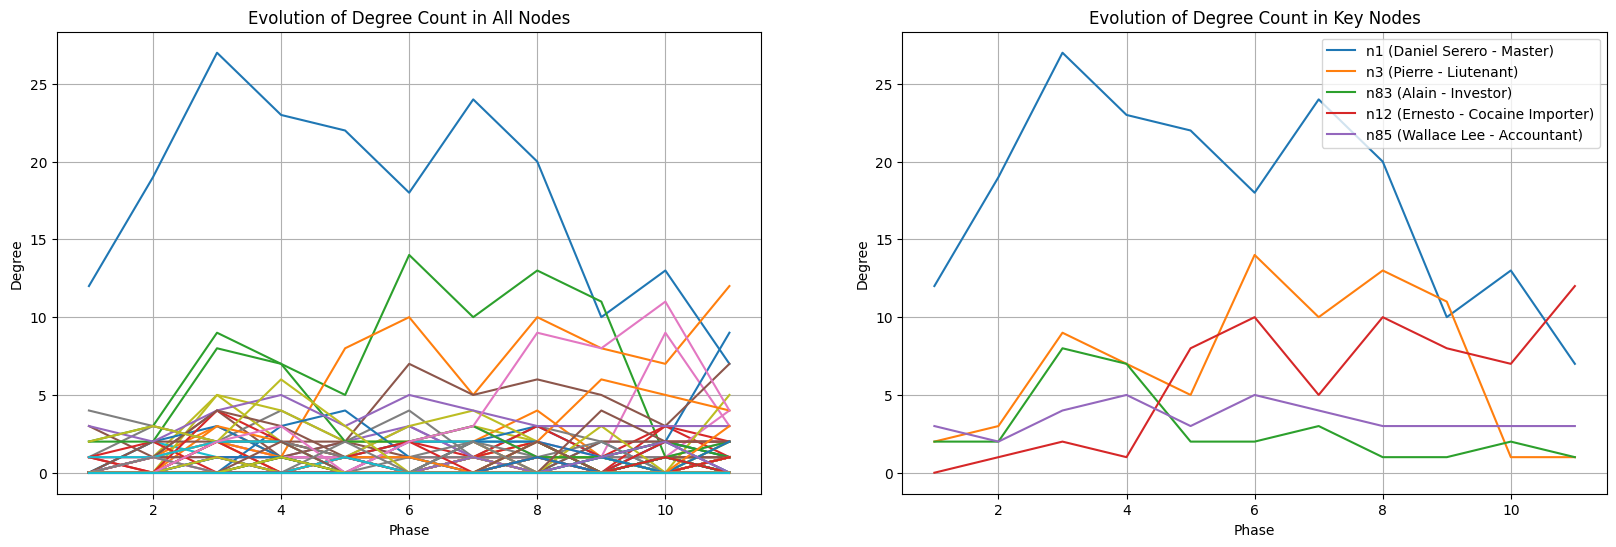

In [11]:
# Create a plot with one row and two columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# ========== ALL NODE DEGREE EVOLUTION ========= #

# Go through each node and get the degree evolution
for node_number in range(110):
    node_name = "n" + str(node_number + 1)
    node_degree = [G[i].degree(node_name) if node_name in G[i] else 0 for i in phases]
    ax1.plot(phases, node_degree)

# Set the title of the first plot
ax1.set_title("Evolution of Degree Count in All Nodes")
ax1.set_xlabel("Phase")
ax1.set_ylabel("Degree")
ax1.grid()

# ============== NODES OF INTEREST ============= #

# Get the degree evolution for certain nodes of interest
n1_degree = [G[i].degree("n1") for i in phases]
n3_degree = [G[i].degree("n3") for i in phases]
n83_degree = [G[i].degree("n83") for i in phases]
n12_degree = [G[i].degree("n12") if "n12" in G[i] else 0 for i in phases]
n85_degree = [G[i].degree("n85") if "n85" in G[i] else 0 for i in phases]

# Plot the evolution of the degree evolution
ax2.plot(phases, n1_degree, label="n1 (Daniel Serero - Master)")
ax2.plot(phases, n3_degree, label="n3 (Pierre - Liutenant)")
ax2.plot(phases, n83_degree, label="n83 (Alain - Investor)")
ax2.plot(phases, n12_degree, label="n12 (Ernesto - Cocaine Importer)")
ax2.plot(phases, n85_degree, label="n85 (Wallace Lee - Accountant)")

# Add a legend to tag each of the plot lines
ax2.set_title("Evolution of Degree Count in Key Nodes")
ax2.set_xlabel("Phase")
ax2.set_ylabel("Degree")
ax2.grid()
ax2.legend()

# ================= SHOW PLOTS ================= #

plt.show()

### Part (d): 

**(5 points) (300 words, 400 word limit.)**

In the context of criminal networks, what would each of these metrics (including degree, betweenness, and eigenvector centrality) teach you about the importance of an actor's role in the traffic? In your own words, could you explain the limitations of degree centrality? In your opinion, which one would be most relevant to identify who is running the illegal activities of the group? Please justify.

- Degree centrality measures the number of connections that a node has. If a player has a small degree centrality, it will probably mean that they are someone lower in the chain of command (like a dealer), while players with a large degree centrality will probably fulfill more important roles. However, this measure only captures the importance of immediate connections between nodes, so the actual importance of a node could be undermined. For example, if the mastermind of the operation chose to be very secretive and handle everything through a third party, its degree would've been really low, since he would've have only 1 connection, while being the most important player in the operation. 

   Then we have betweenness centrality. By definition, betweenness measures the number of times a node acts as a bridge along the shortest path between two other nodes. In this context, a higher betweenness centrality value could indicate that the node is either a middleman connecting the lower and higher ranks (which would explain why the cocaine importer n12 appeared as one of the nodes with the highest betweenness) or that they are one of the most important figures in the organization, as they are the ones connecting or "glueing together" different sectors of the operation. This would explain why n1 (the mastermind) and n3 (the lieutenant) appeared as two of the nodes with the highest betweenness centrality.

   Finally, we have eigenvector centrality. This type of centrality measures the importance of the nodes that a player is connected to (or are connecting to it). This is why n1 and n3 appeared as two of the players with the highest eigenvector centrality, they are the most important when running the organization as they are basically giving out the orders to everyone down the chain of command. Because of this, I think this would be the best measure to use when identifying key players in the organization. It sorts out actors by their relevance. Once the most important are identified, betweenness centrality could be used to identify the middlemen. By arresting both the most relevant players and their middlemen, the organization should see a significant decrease in its activity.

### Part (e) 

**(3 points) (100 words, 200 word limit)**

In real life, the police need to effectively use all the information they have gathered, to identify who is responsible for running the illegal activities of the group. Armed with a qualitative understanding of the centrality metrics from Part (d) and the quantitative analysis from part Part (b) Question 5, integrate and interpret the information you have to identify which players were most central (or important) to the operation.

Hint: Note that the definition of a player's “importance" (i.e. how central they are) can vary based on the question you are trying to answer. Begin by defining what makes a player important to the group (in your opinion); use your answers from Part (d) to identify which metric(s) are relevant based on your definition and then, use your quantitative analysis to identify the central and peripheral traffickers. You may also perform a different quantitative analysis, if your definition of importance requires it.

- I believe that the most important players in the trafficking operation are those who provide the most cohesion in the network, bringing together disparate parts to keep the operation going. For example, a key player could be the main drug supplier, as without them, the rest of the operation would halt while the higher ranks search for a replacement.

    With that in mind, I believe that we can use eigenvector or katz centrality to identify the players with the most influence in the network, and then complement the list of suspects with those with the highest betweenness centrality to also identify their most influential middlemen. This leads us to n1 (the mastermind), n3 (his lieutenant), n12 (the cocaine importer), n83 and n87 (the investors), n76 (procurement of marijuana) and n85 (the accountant). The order in which they are captured matters as well: The middleman should be captured first (n85, n76, n83, n87), as they could communicate with the higher ranks in order to warn them, and very soon after, the rest should be captured (n1, n3, n12) to completely dismantle the operation. This will leave the lower ranks unorganized and vulnerable, making it easier to capture them as well.

In [12]:
# Calculate the katz centrality for each phase
katz_centrality = {
    i: nx.katz_centrality(G[i]) for i in phases
}

# Average the katz centrality for each player across all phases
average_katz = {}
for i in range(num_players):

    # Create a key for each player (n1, n2, n3, ...)
    player_name = "n" + str(i+1)

    # Initialize the katz centrality to 0
    average_katz[player_name] = 0

    # Add up the katz centrality for each phase
    for phase in phases:
        if player_name not in katz_centrality[phase]:
            average_katz[player_name] += 0
        else:
            average_katz[player_name] += katz_centrality[phase][player_name]
        
    # Divide by the number of phases to get the average
    average_katz[player_name] /= len(phases)

# Sort the average katz centrality in descending order
# (x[1] refers to the katz centrality value)
sorted_average_katz = sorted(
    average_katz.items(),
    key=lambda x: x[1],
    reverse=True
)

# Print the top players with the highest average katz centrality
print()
print("Top Players with Highest Average Katz Centrality")
pp.pprint(sorted_average_katz[:5])


Top Players with Highest Average Katz Centrality
[   ('n1', 0.4125389881771779),
    ('n3', 0.25197844029500116),
    ('n85', 0.1921697597322964),
    ('n12', 0.1832249202161779),
    ('n83', 0.17668753925529634)]


### Part (f): Question 2 

**(3 points) (200 words, 300 word limit)**

The change in the network from Phase X to X+1 coincides with a major event that took place during the actual investigation. Identify the event and explain how the change in centrality rankings and visual patterns, observed in the network plots above, relates to said event.

- The major event that took place in phase 4 was the first seizure. Based on the visual progression of the graph and the evolution in the number of edges and nodes, it seems like after the first seizure, and throughout phase 5, most of the momentum that the operation had going was lost due to a big chunk of the most important players starting to act more cautiously and the non-trafficker members scattering. This can be evidenced by the fact that the nodes that disappeared from phase 3 to 4 were mainly non-trafficker nodes, as well as having the number of edges in the overall graph decrease from 56 to 48 (an 11% reduction), with the highest drop-off coming from Antonio Iannacci (n89), one of the investors. 

   He probably saw the clientele starting to fall after the first seizure, and decided to pull most of the funding he provided to the project, not only slowing down operations as the financial resources decreased, but also lowering the interest in other players like Wallace Lee (n85), the operation's accountant. This tendency continued until phase 6, when the operation moved from trafficking marijuana, to trafficking cocaine, causing a slight surge in connections and other centrality measures (like betweenness and eigenvector centrality) in some players.

   Another thing worth mentioning is that Daniel Serero, the mastermind of the operation, saw a gradual decrease in almost all centrality measures as the phases progressed, which could indicate that he was getting more and more cautious as the operation was getting more and more dangerous.

Nodes present in phase 4 but not in phase 5
{'n63', 'n53', 'n35', 'n14', 'n109', 'n107', 'n106', 'n52', 'n49', 'n51', 'n90'}
Nodes present in phase 3 but not in phase 4
{'n10', 'n34', 'n55', 'n32', 'n99', 'n56', 'n50', 'n48'}

Top 10 Nodes with Highest Degree Change (Phase 3 to 4)
[   ('n89', 4),
    ('n8', 2),
    ('n85', 1),
    ('n107', 1),
    ('n4', 0),
    ('n88', 0),
    ('n90', 0),
    ('n76', 0),
    ('n35', 0),
    ('n13', 0)]


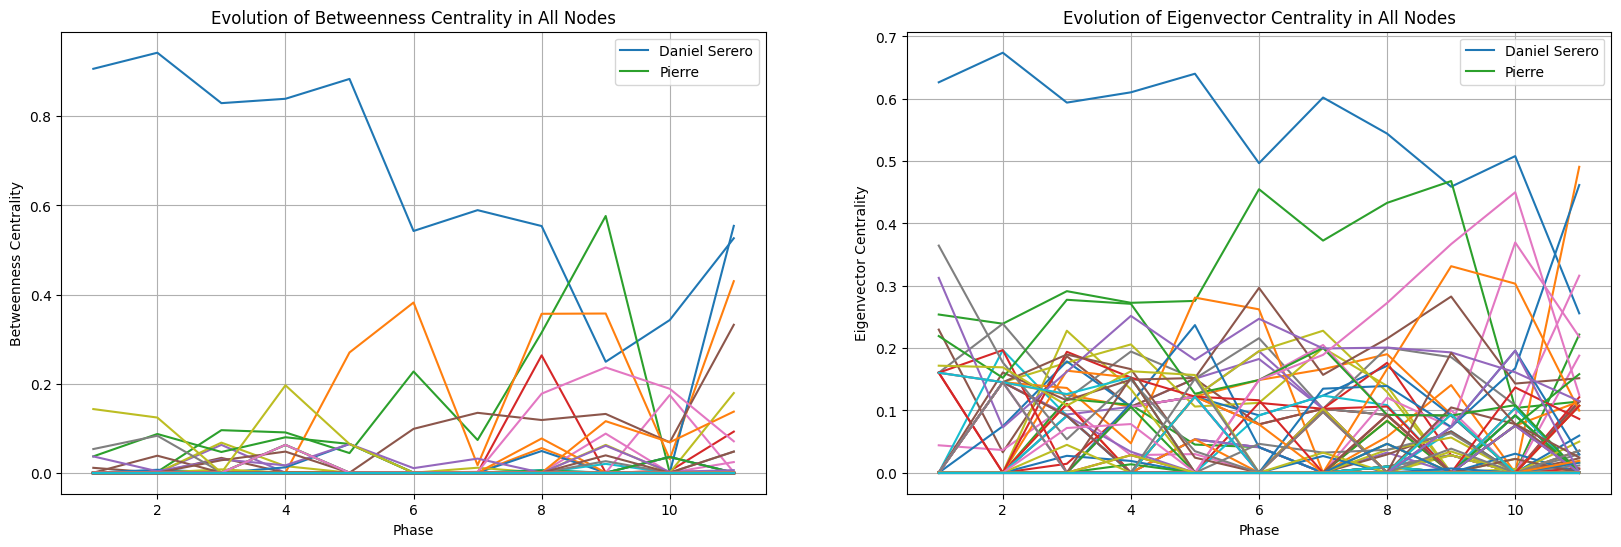

In [13]:
# ======= NODES NOT INCLUDED FROM PHASE 3 ====== #

# Check the nodes that are not present in phase 5 compared to phase 4
print("Nodes present in phase 4 but not in phase 5")
print(set(G[4]) - set(G[5]))

print("Nodes present in phase 3 but not in phase 4")
print(set(G[3]) - set(G[4]))

# ======= TOP 10 NODES WITH DEGREE CHANGE ====== #

# Get the degree changes from phase 3 to 4 for each node
degree_change = {
    node: G[4].degree(node) - G[3].degree(node) for node in G[4] if node in G[3] and node in G[4]
}

# Sort the degree changes in descending order
sorted_degree_change = sorted(
    degree_change.items(),
    key=lambda x: x[1],
    reverse=True
)

# Print the top 10 nodes with the highest degree change
print()
print("Top 10 Nodes with Highest Degree Change (Phase 3 to 4)")
pp.pprint(sorted_degree_change[:10])

# ========== EVOLUTION OF BETWEENNESS ========== #

# Generate a figure with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Get the betweenness centrality for each phase
betweenness_centrality = {
    i: nx.betweenness_centrality(G[i]) for i in phases
}

# Plot the evolution of the betweenness centrality for each node
for node_number in range(110):
    node_name = "n" + str(node_number + 1)
    node_betweenness = [betweenness_centrality[i][node_name] if node_name in betweenness_centrality[i] else 0 for i in phases]

    if node_name == "n1":
        ax1.plot(phases, node_betweenness, label="Daniel Serero")
    elif node_name == "n3":
        ax1.plot(phases, node_betweenness, label="Pierre")
    else:
        ax1.plot(phases, node_betweenness)


# Set the title of the plot
ax1.set_title("Evolution of Betweenness Centrality in All Nodes")
ax1.set_xlabel("Phase")
ax1.set_ylabel("Betweenness Centrality")
ax1.legend()
ax1.grid()

# Get the eigenvector centrality for each phase
eigenvector_centrality = {
    i: nx.eigenvector_centrality(G[i]) for i in phases
}

# Plot the evolution of the eigenvector centrality for each node
for node_number in range(110):
    node_name = "n" + str(node_number + 1)
    node_eigenvector = [eigenvector_centrality[i][node_name] if node_name in eigenvector_centrality[i] else 0 for i in phases]

    if node_name == "n1":
        ax2.plot(phases, node_eigenvector, label="Daniel Serero")
    elif node_name == "n3":
        ax2.plot(phases, node_eigenvector, label="Pierre")
    else:
        ax2.plot(phases, node_eigenvector)

# Set the title of the plot
ax2.set_title("Evolution of Eigenvector Centrality in All Nodes")
ax2.set_xlabel("Phase")
ax2.set_ylabel("Eigenvector Centrality")
ax2.legend()
ax2.grid()

# Show the plot
plt.show()

### Part (g): 

**(4 points) (200 words, 300 word limit.)**

While centrality helps explain the evolution of every player's role individually, we need to explore the global trends and incidents in the story in order to understand the behavior of the criminal enterprise.

Describe the coarse pattern(s) you observe as the network evolves through the phases. Does the network evolution reflect the background story?

Hint: Look at the set of actors involved at each phase, and describe how the composition of the graph is changing. Investigate when important actors seem to change roles by their movement within the hierarchy. Correlate your observations with the information that the police provided in the setup to this homework problem.

- I think the network evolution aligns very well with the background evolution. Here's what I think happened based on the available info: In the beginning, Daniel Serero (n1) and Alain Levy (n83) made the organization grow extremely quickly, jumping at any new opportunity of acquiring new partners, suppliers and investors (supported by a rapid growth in number of nodes and edges). Then came the first seizure at phase 4. This caused many of the non-trafficker members of the organization to lose faith in the project, decreasing the revenue and pushing Antonio Ianacci (n89), another important investor, to pull most of the funding he had provided (denoted by a decrease in his degree). This continued throughout phases 5 and 6, as another big seizure took place during phase 6.

    After this, the chain of command changed. As Daniel Serero grew more careful, he decided to refrain from directly contacting all sections of the organization and made Pierre Perlini (n3) act more and more as his right-hand-man, basically talking through him (denoted by a steady decrease in all measures for Daniel Serero, while a steady increase was seen in all measures for Pierre Perlini). Here they decided add cocaine to their list of products, which caused a slight increase in the number of members of the network (increase in edges and nodes). However, after phase 7, came at least 1 seizure per phase, which caused the organization to slowly lose structure (noted by a rapid decrease in all centrality measures), as the most important players members either started to act more cautiously or slowly disappeared from the network. This continued until phase 11 when the organization was dismantled.

### Part (h) 

**(2 points) (50 words, 100 word limit.)**

Are there other actors that play an important role but are not on the list of investigation (i.e., actors who are not among the 23 listed above)? List them, and explain why they are important.

The remaining two questions will concern the directed graphs derived from the CAVIAR data.

- 

In [ ]:
# List all of the "important nodes"
important_nodes = [
    1, 3, 83, 86, 85, 6, 11, 88, 
    106, 89, 84, 5, 8, 76, 77, 87, 
    82, 96, 12, 17, 80, 33, 16
]

# 

### Part (i) 

**(2 points) (150 words, 250 word limit.)**

What are the advantages of looking at the directed version vs. undirected version of the criminal network?

Hint: If we were to study the directed version of the graph, instead of the undirected, what would you learn from comparing the in-degree and out-degree centralities of each actor? Similarly, what would you learn from the left- and right-eigenvector centralities, respectively?

- The main benefit of including directionality in the connections of a graph, is that we get a better sense of how the information is transferred across the network. In an undirected graph, we assume that everyone talks to everybody else in a mutual conversation. However, in reality, its much more likely that the graph has a directed structure, with some players exclusively exchanging information with others, but not the other way around. For example, by comparing the in-degree and out-degree centralities of each actor, we could identify the "bosses" of the network - the ones that are almost exclusively sending information to others, but not receiving much information in return, and the "underlings" - the ones that are almost exclusively receiving information from other nodes. This could also allow for a more effective capture of the key players, as the authorities could focus on the better connected players, with the poorest communication pathways to their bosses. That way the police could start dismantling key figures, while still buying them time to capture the bosses without them fleeing.

    On the other hand, we have left and right eigenvector centrality, which will still measure importance, but now it will measure the importance of the nodes pointing to it (left eigenvector centrality) or the importance of the nodes it points to (right eigenvector centrality). This could also lead to some interesting conclusions, as a high left eigenvector centrality could indicate could indicate that the node is receiving a lot of information from key players, making it not necessarily the most important, but one of the most important to capture, as it could be considered a key figure in the information flow network. On the other hand, a high right eigenvector centrality could indicate that the node is sending a lot of information to key players, making it either a "boss" figure or a key informant.

- that we would learn is the direction or "flow" in the chain of command. Previously, we simply assumed that the communication simply flowed both ways from boss to underlings and vice-versa, but now that the communication can be directed, we can analyze new interesting behaviors, like, for example, the fact that Daniel Serero (n1) had a higher in-degree than out-degree, could mean that he was receiving more information than he was sending out, which could indicate a higher level of caution.

### Part (j) 

**(4 points) (300 words, 400 word limit)**

Recall the definition of hubs and authorities. Compute the hub and authority score of each actor, and for each phase. (Remember to load the adjacency data again this time using `create_using = nx.DiGraph()`.)

With networkx you can use the `nx.algorithms.link_analysis.hits` function, set `max_iter=1000000` for best results.

Using this, what relevant observations can you make on how the relationship between n1 and n3 evolves over the phases. Can you make comparisons to your results in Part (g)?